In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('Airbnb_Open_Data.csv')
df_Airbnb = df.copy()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4568\1620222045.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [137]:
df_Airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [138]:
df_Airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [139]:
df_Airbnb.shape

(102599, 26)

In [140]:
df_Airbnb.dtypes.sort_values(ascending=False)

room type                          object
country code                       object
house_rules                        object
last review                        object
service fee                        object
price                              object
NAME                               object
cancellation_policy                object
instant_bookable                   object
license                            object
country                            object
neighbourhood                      object
neighbourhood group                object
host name                          object
host_identity_verified             object
long                              float64
lat                               float64
Construction year                 float64
minimum nights                    float64
number of reviews                 float64
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [141]:
df_Airbnb.isnull().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

In [142]:
# Alparecer hay  datos duplicados
for column in df_Airbnb.columns:
    duplicates_count = df_Airbnb[column].duplicated().sum()
    null_count = df_Airbnb[column].isnull().sum()
    print(f"Columna {column}: {duplicates_count} datos duplicados, {null_count} datos nulos")

Columna id: 541 datos duplicados, 0 datos nulos
Columna NAME: 41317 datos duplicados, 250 datos nulos
Columna host id: 542 datos duplicados, 0 datos nulos
Columna host_identity_verified: 102596 datos duplicados, 289 datos nulos
Columna host name: 89408 datos duplicados, 406 datos nulos
Columna neighbourhood group: 102591 datos duplicados, 29 datos nulos
Columna neighbourhood: 102374 datos duplicados, 16 datos nulos
Columna lat: 80607 datos duplicados, 8 datos nulos
Columna long: 84824 datos duplicados, 8 datos nulos
Columna country: 102597 datos duplicados, 532 datos nulos
Columna country code: 102597 datos duplicados, 131 datos nulos
Columna instant_bookable: 102596 datos duplicados, 105 datos nulos
Columna cancellation_policy: 102595 datos duplicados, 76 datos nulos
Columna room type: 102595 datos duplicados, 0 datos nulos
Columna Construction year: 102578 datos duplicados, 214 datos nulos
Columna price: 101447 datos duplicados, 247 datos nulos
Columna service fee: 102367 datos dupli

# Tratar con los datos faltantes

In [143]:
df_Airbnb.license.unique()

array([nan, '41662/AL'], dtype=object)

In [144]:
# como vemos la columna 'license' tiene 102597 datos faltantes y solo 2 datos reales por lo que no aporta mucha información
df_Airbnb.loc[~df_Airbnb.license.isnull()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [145]:
# Es preciso entonces eliminar esta columna
df_Airbnb.drop('license', axis=1, inplace =True)

In [146]:
df_Airbnb.house_rules.unique()

array(["Clean up and treat the home the way you'd like your home to be treated.  No smoking.",
       'Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.',
       "I encourage you to use my kitchen, cooking and laundry facilities. There is no additional charge to use the washer/dryer in the basement.  No smoking, inside or outside. Come home as late as you want.  If you come home stumbling drunk, it's OK the first time. If you do it again, and you wake up me or the neighbors downstairs, we will be annoyed.  (Just so you know . . . )",
       ...,
       '15 nights minimum stay No pets at any time No smoking Please be mindful of the furnitu

In [147]:
# como la mayoria se trata de describir como son reglas y 
# presenta valores faltantes podemos reemplazar estos valores por 'Empty' 
# no se elimina 'house_rules' porque puede ser una variable predictora del precio

df_Airbnb.loc[df_Airbnb.house_rules.isnull(), 'house_rules'] = 'Empty'

In [148]:
# vemos que la variable 'last review' es de tipo cadena lo mejor es convertir a tipo fecha y poder trabajer mejor
df_Airbnb['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last review, Length: 102599, dtype: object

In [149]:
df_Airbnb['last review'] = pd.to_datetime(df_Airbnb['last review'])

In [150]:
# comprobamos las marcas de tiempo de principio a fin 
df_Airbnb['last review']. min(), df_Airbnb['last review']. max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

<Axes: ylabel='last review'>

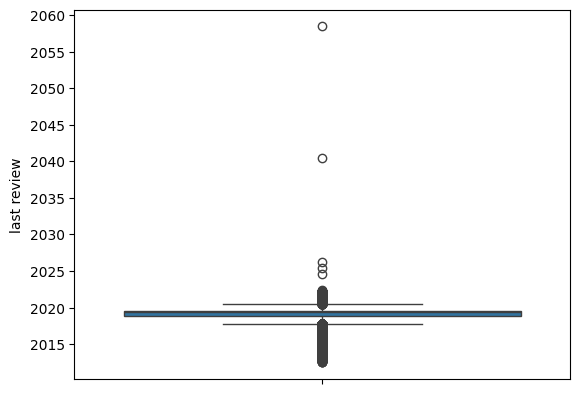

In [151]:
sns.boxplot(df_Airbnb['last review'])

In [152]:
# se puede ver que la variable 'last review' muestra fechas falsas 
df_Airbnb[df_Airbnb['last review'].apply(lambda x: x.year) > 2023]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
127,1071478,Garden studio in the Upper East Sid,77172555024,unconfirmed,Miller,Manhattan,Upper East Side,40.77800,-73.94822,United States,...,$571,$114,5.0,21.0,2024-08-15,0.19,4.0,NaN,395.0,"Dear Guests, Welcome to 62 Cornwall St! I hope..."
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,United States,...,$539,$108,NaN,41.0,2025-06-26,0.38,2.0,1.0,NaN,"You will be sharing a bathroom, so you must be..."
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,United States,...,$842,$168,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0,No rules per say. I just ask that you respect ...
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,United States,...,$920,$184,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0,Check-In is 3pm. Check-Out is 12 Noon. In or...
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,United States,...,$721,$144,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0,Empty


In [153]:
# ahora vamos arreglar los datos faltantes reemplando por la medina
df_Airbnb.loc[df_Airbnb['last review'].isnull(), 'last review'] = df_Airbnb['last review'].median()

In [154]:
# hay 541 datos duplicados para el Id
df_Airbnb.duplicated().sum()

541

In [155]:
# observamos que hay 541 duplicados, sera mejor eliminarlos

df_Airbnb.drop_duplicates(keep='first', inplace=True)

In [156]:
df_Airbnb.duplicated(subset=['host name', 'lat', 'long', 'price']).sum()

32753

In [157]:
sub_df_Airbnb = df_Airbnb.loc[df_Airbnb.duplicated(subset=['host name', 'lat', 'long', 'price'], keep=False)].copy()
sub_df_Airbnb = sub_df_Airbnb.groupby(['host name', 'lat', 'long', 'price'])
for key, subdf in sub_df_Airbnb:
    print(key)
    print(pd.DataFrame(subdf), '\n')
    break

('(Ari) HENRY LEE', 40.78938, -73.94679, '$1,179 ')
             id               NAME      host id host_identity_verified  \
10316   6698863  MANHATTAN LIVING!  47503557541               verified   
72149  40849229  MANHATTAN LIVING!  29667285224               verified   

             host name neighbourhood group neighbourhood       lat      long  \
10316  (Ari) HENRY LEE           Manhattan   East Harlem  40.78938 -73.94679   
72149  (Ari) HENRY LEE           Manhattan   East Harlem  40.78938 -73.94679   

             country  ...    price service fee minimum nights  \
10316  United States  ...  $1,179        $236             7.0   
72149  United States  ...  $1,179        $236             7.0   

      number of reviews  last review reviews per month review rate number  \
10316               3.0   2017-12-08              0.06                1.0   
72149               3.0   2017-12-08              0.06                1.0   

       calculated host listings count  availability 365 

In [158]:
del sub_df_Airbnb, subdf
df_Airbnb.drop_duplicates(subset=['host name', 'lat', 'long', 'price'], inplace=True)
df_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69305 entries, 0 to 102050
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69305 non-null  int64         
 1   NAME                            69097 non-null  object        
 2   host id                         69305 non-null  int64         
 3   host_identity_verified          69088 non-null  object        
 4   host name                       68992 non-null  object        
 5   neighbourhood group             69276 non-null  object        
 6   neighbourhood                   69289 non-null  object        
 7   lat                             69297 non-null  float64       
 8   long                            69297 non-null  float64       
 9   country                         68982 non-null  object        
 10  country code                    69219 non-null  object        
 11  instan

In [168]:
for column in df_Airbnb.columns:
    unique_count = df_Airbnb[column].nunique()
    duplicates_count = df_Airbnb[column].duplicated().sum()
    null_count = df_Airbnb[column].isnull().sum()
    print(f"Columna {column}: {unique_count} datos unicos, {duplicates_count} datos duplicados, {null_count} datos nulos") 
    print('=='*50)

Columna id: 69305 datos unicos, 0 datos duplicados, 0 datos nulos
Columna NAME: 61233 datos unicos, 8071 datos duplicados, 208 datos nulos
Columna host id: 69304 datos unicos, 1 datos duplicados, 0 datos nulos
Columna host_identity_verified: 2 datos unicos, 69302 datos duplicados, 217 datos nulos
Columna host name: 13190 datos unicos, 56114 datos duplicados, 313 datos nulos
Columna neighbourhood group: 7 datos unicos, 69297 datos duplicados, 29 datos nulos
Columna neighbourhood: 224 datos unicos, 69080 datos duplicados, 16 datos nulos
Columna lat: 21991 datos unicos, 47313 datos duplicados, 8 datos nulos
Columna long: 17774 datos unicos, 51530 datos duplicados, 8 datos nulos
Columna country: 1 datos unicos, 69303 datos duplicados, 323 datos nulos
Columna country code: 1 datos unicos, 69303 datos duplicados, 86 datos nulos
Columna instant_bookable: 2 datos unicos, 69302 datos duplicados, 86 datos nulos
Columna cancellation_policy: 3 datos unicos, 69301 datos duplicados, 57 datos nulos
C

In [169]:
# necesitamos saber la variabilidad de los datos
df_Airbnb.isnull().sum().sort_values(ascending=False)

reviews per month                 10814
availability 365                    438
minimum nights                      363
country                             323
host name                           313
price                               245
service fee                         241
review rate number                  239
host_identity_verified              217
NAME                                208
Construction year                   190
number of reviews                   152
calculated host listings count      144
country code                         86
instant_bookable                     86
cancellation_policy                  57
neighbourhood group                  29
neighbourhood                        16
long                                  8
lat                                   8
id                                    0
last review                           0
room type                             0
host id                               0
house_rules                           0


In [170]:
df_Airbnb.nunique().sort_values(ascending = False)

id                                69305
host id                           69304
NAME                              61233
lat                               21991
long                              17774
host name                         13190
last review                        2477
house_rules                        1977
price                              1151
reviews per month                  1016
number of reviews                   476
availability 365                    437
service fee                         231
neighbourhood                       224
minimum nights                      148
calculated host listings count       78
Construction year                    20
neighbourhood group                   7
review rate number                    5
room type                             4
cancellation_policy                   3
host_identity_verified                2
instant_bookable                      2
country                               1
country code                          1


In [171]:
df_Airbnb['reviews per month'].describe()

count    58491.000000
mean         1.396071
std          1.790129
min          0.010000
25%          0.240000
50%          0.790000
75%          2.000000
max         90.000000
Name: reviews per month, dtype: float64

In [173]:
# se sustituye los datos nulos por la media
df_Airbnb['reviews per month'] = df_Airbnb['reviews per month'].fillna(0.79)

In [174]:
df_Airbnb[['cancellation_policy', 'country', 'NAME', 
    'instant_bookable', 'country code', 'neighbourhood', 'neighbourhood group',
    'host name', 'host_identity_verified']].mode()

,cancellation_policy,country,NAME,instant_bookable,country code,neighbourhood,neighbourhood group,host name,host_identity_verified
0,moderate,United States,Water View King Bed Hotel Room,False,US,Bedford-Stuyvesant,Manhattan,Michael,unconfirmed


In [175]:
# la columna no es relevante para predecir el precio 'cancellation_policy', 
# 'country' siempre se repite el mismo valor 'United States' al igual que la columna 'country code'
df_Airbnb = df_Airbnb.drop(['cancellation_policy', 'country'], axis=1)

In [176]:
df_Airbnb = df_Airbnb.drop(['country code'], axis = 1)

In [177]:
# haciendo una revision a cada columna del dataframe con el metodo '.value_counts()' 
# en busca de errores ortograficos que generen datos atipicos se tiene que 'neighbourhood group' 
# muestra dos valores erroneos 

df_Airbnb['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        29573
Brooklyn         27881
Queens            9260
Bronx             1911
Staten Island      649
brookln              1
manhatan             1
Name: count, dtype: int64

In [178]:
df_Airbnb['neighbourhood group'] = df_Airbnb['neighbourhood group'].replace({'manhatan': 'Manhattan', 'brookln': 'Brooklyn'})

In [179]:
# los valores nulos se remplazan por 'Empty'
df_Airbnb.loc[df_Airbnb.NAME.isnull(), 'NAME'] = 'Empty'

In [180]:
# se reemplaza los valores nulos de la columna 'host name' por 'Empty'
df_Airbnb['host name'] = df_Airbnb['host name'].fillna('Empty')

In [183]:
df_Airbnb['host_identity_verified'].mode()

0    unconfirmed
Name: host_identity_verified, dtype: object

In [184]:
# los valores nulos se cambian por la media de su columna 'host_identity_verified'
df_Airbnb['host_identity_verified'] = df_Airbnb['host_identity_verified'].fillna('unconfirmed')

In [186]:
# ahora usaremos lat y long para para sustituir los valores faltates
# de la columnas 'neighbourhood' y 'neighbourhood group' para ello usaremos la siguiente libreria

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")


In [187]:
# revismos primero cuantos valores nulos hay en 'neighbourhood'
df_Airbnb['neighbourhood'].isnull().value_counts()

neighbourhood
False    69289
True        16
Name: count, dtype: int64

In [188]:
# observemos mejor estos valores nulos 
df_Airbnb[df_Airbnb.neighbourhood.isnull()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
517,1286875,"""The Oasis"" on Bedford Williamsburg",30603782652,unconfirmed,Lucas,Brooklyn,NaN,40.71580,-73.95803,NaN,...,NaN,$130,6.0,1.0,2016-01-01,0.02,5.0,1.0,266.0,1. No parties. 2. Respect the neighbors. Nois...
547,1303444,STYLISH EAST VILLAGE FLAT,6825076306,verified,Arnold,Manhattan,NaN,40.73089,-73.98195,True,...,$749,$150,30.0,25.0,2018-04-30,0.26,4.0,1.0,67.0,Empty
553,1306758,Comfortable. Spacious. Private Room.,45534966158,unconfirmed,Ned,Manhattan,NaN,40.71300,-73.99752,True,...,$613,$123,NaN,172.0,2019-07-02,1.84,5.0,2.0,63.0,Please be gentle with the furniture and applia...
575,1318909,"2 Bed, 2 Bath Apartment on Central Park West",86633710982,unconfirmed,Arthur,Manhattan,NaN,40.79816,-73.96190,True,...,$892,$178,2.0,45.0,2019-04-22,0.47,4.0,3.0,4.0,Empty
589,1326641,CBG Helps Haiti Rm #3,33952991254,verified,Jacob,Brooklyn,NaN,40.68012,-73.97847,False,...,$793,$159,2.0,23.0,2018-09-15,0.24,1.0,6.0,NaN,Please remember that this is a residential bui...
613,1339896,Wonderfully inviting East Village,84560895335,verified,Carter,Manhattan,NaN,40.72709,-73.98274,True,...,$486,$97,1.0,109.0,2015-10-02,1.15,2.0,1.0,116.0,#NAME?
624,1345971,Stylish Studio with exclusive Terrace,21547822804,unconfirmed,Cole,Manhattan,NaN,40.75348,-73.97065,False,...,$417,$83,30.0,136.0,2019-06-19,1.45,4.0,1.0,272.0,Please remember that this is a residential bui...
633,1350942,Lower East Side/Chinatown 1 Bedroom,58408401042,verified,Higgins,Manhattan,NaN,40.71693,-73.98948,False,...,"$1,148",$230,5.0,8.0,2018-05-18,0.11,3.0,1.0,42.0,Empty
643,1356465,2BR Apt - 20min to Soho,21192497123,verified,Barrett,Brooklyn,NaN,40.68016,-73.94878,False,...,$938,$188,3.0,5.0,2017-07-09,0.05,2.0,1.0,408.0,Smoking is allowed on the patio only. No pets ...
670,1371377,Loft Suite @ The Box House Hotel,75427375884,verified,Gray,Brooklyn,NaN,40.73641,-73.95330,False,...,$104,$21,3.0,24.0,2018-11-06,0.32,4.0,28.0,419.0,Empty


In [189]:
# crearemos una funcion que nos permita obtener los nombres de las ubicaciones específicas basándose en 
# las coordenadas geográficas.

def loc_from_coord(lat, long):
    location = geolocator.reverse(str(lat)+","+str(long))
    return location.raw['address'].get('road', '')

In [190]:
# y verificamos si la función trabaja bien

temp = df_Airbnb.loc[df_Airbnb.neighbourhood.isnull()].copy()
print(loc_from_coord(temp.iloc[2].lat, temp.iloc[2].long))

Henry Street


In [191]:
# ahora podremos sustituir los valores nulos de la columna 'neighbourhood'

idx = df_Airbnb.loc[df_Airbnb.neighbourhood.isnull()].index
df_Airbnb.loc[idx, 'neighbourhood'] = df_Airbnb.loc[idx].apply(lambda x: \
                                                loc_from_coord(x.lat, x.long), axis=1)

In [192]:
# verificamos 
df_Airbnb.loc[idx]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
517,1286875,"""The Oasis"" on Bedford Williamsburg",30603782652,unconfirmed,Lucas,Brooklyn,Driggs Avenue,40.71580,-73.95803,NaN,...,NaN,$130,6.0,1.0,2016-01-01,0.02,5.0,1.0,266.0,1. No parties. 2. Respect the neighbors. Nois...
547,1303444,STYLISH EAST VILLAGE FLAT,6825076306,verified,Arnold,Manhattan,East 14th Street,40.73089,-73.98195,True,...,$749,$150,30.0,25.0,2018-04-30,0.26,4.0,1.0,67.0,Empty
553,1306758,Comfortable. Spacious. Private Room.,45534966158,unconfirmed,Ned,Manhattan,Henry Street,40.71300,-73.99752,True,...,$613,$123,NaN,172.0,2019-07-02,1.84,5.0,2.0,63.0,Please be gentle with the furniture and applia...
575,1318909,"2 Bed, 2 Bath Apartment on Central Park West",86633710982,unconfirmed,Arthur,Manhattan,Manhattan Avenue,40.79816,-73.96190,True,...,$892,$178,2.0,45.0,2019-04-22,0.47,4.0,3.0,4.0,Empty
589,1326641,CBG Helps Haiti Rm #3,33952991254,verified,Jacob,Brooklyn,5th Avenue,40.68012,-73.97847,False,...,$793,$159,2.0,23.0,2018-09-15,0.24,1.0,6.0,NaN,Please remember that this is a residential bui...
613,1339896,Wonderfully inviting East Village,84560895335,verified,Carter,Manhattan,Avenue A,40.72709,-73.98274,True,...,$486,$97,1.0,109.0,2015-10-02,1.15,2.0,1.0,116.0,#NAME?
624,1345971,Stylish Studio with exclusive Terrace,21547822804,unconfirmed,Cole,Manhattan,East 47th Street,40.75348,-73.97065,False,...,$417,$83,30.0,136.0,2019-06-19,1.45,4.0,1.0,272.0,Please remember that this is a residential bui...
633,1350942,Lower East Side/Chinatown 1 Bedroom,58408401042,verified,Higgins,Manhattan,Grand Street,40.71693,-73.98948,False,...,"$1,148",$230,5.0,8.0,2018-05-18,0.11,3.0,1.0,42.0,Empty
643,1356465,2BR Apt - 20min to Soho,21192497123,verified,Barrett,Brooklyn,Fulton Street,40.68016,-73.94878,False,...,$938,$188,3.0,5.0,2017-07-09,0.05,2.0,1.0,408.0,Smoking is allowed on the patio only. No pets ...
670,1371377,Loft Suite @ The Box House Hotel,75427375884,verified,Gray,Brooklyn,Clay Street,40.73641,-73.95330,False,...,$104,$21,3.0,24.0,2018-11-06,0.32,4.0,28.0,419.0,Empty


In [193]:
# ahora haremos lo mismo para la columna 'neighbourhood group' creando una funcion de coordenadas 
def neigh_from_coord(lat,long):
    location = geolocator.reverse(str(lat)+","+str(long))
    return location.raw['address'].get('suburb', '')

In [194]:
# observamos primero los valores nulos
df_Airbnb[df_Airbnb['neighbourhood group'].isnull()].head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
74,1042206,"HARLEM, NEW YORK WELCOMES YOU!!",98195975718,unconfirmed,Violet,NaN,Washington Heights,40.83139,-73.94095,True,...,$571,$114,2.0,49.0,2019-06-18,1.60,2.0,2.0,NaN,The usual courtesies apply: - No smoking - No ...
75,1042759,BLUE TRIM GUEST HOUSE,4726877402,unconfirmed,Audrey,NaN,Clinton Hill,40.68346,-73.96374,True,...,$398,$80,2.0,105.0,2019-06-26,0.92,1.0,1.0,NaN,Shoes off please Cat can go in or out as he de...
76,1043311,Charming East Village One Bedroom Flat,74322993447,verified,Violet,NaN,East Village,40.72828,-73.98801,False,...,$618,$124,5.0,21.0,2019-01-02,0.20,4.0,1.0,NaN,no smoking quiet
77,1043863,Manhattan Room,11468499446,verified,Sofia,NaN,Upper East Side,40.76865,-73.95058,False,...,$116,$23,1.0,142.0,2019-07-06,1.50,4.0,1.0,NaN,I'm a semi kosher vegetarian which means that ...
78,1044415,Little King of Queens,68599531533,unconfirmed,Melanie,NaN,Woodside,40.75038,-73.90334,True,...,$54,$11,30.0,25.0,2019-06-14,0.22,2.0,1.0,NaN,No Street Shoes allowed in House. No cooking K...


In [195]:
# verificamos 
idx2 = df_Airbnb.loc[df_Airbnb['neighbourhood group'].isnull()].index
print(neigh_from_coord(df_Airbnb.loc[idx2].iloc[4].lat, df_Airbnb.loc[idx2].iloc[4].long))

Queens County


In [196]:
# luego sustituimos los datos nulos de la columna 'neighbourhood group'
df_Airbnb.loc[idx2, 'neighbourhood group'] = df_Airbnb.loc[idx2].apply(lambda x: \
                                                neigh_from_coord(x.lat, x.long), axis=1)

In [197]:
#verificamos los cambios a la columna 'neighbourhood group'
df_Airbnb.loc[idx2].head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
74,1042206,"HARLEM, NEW YORK WELCOMES YOU!!",98195975718,unconfirmed,Violet,Manhattan,Washington Heights,40.83139,-73.94095,True,...,$571,$114,2.0,49.0,2019-06-18,1.60,2.0,2.0,NaN,The usual courtesies apply: - No smoking - No ...
75,1042759,BLUE TRIM GUEST HOUSE,4726877402,unconfirmed,Audrey,Brooklyn,Clinton Hill,40.68346,-73.96374,True,...,$398,$80,2.0,105.0,2019-06-26,0.92,1.0,1.0,NaN,Shoes off please Cat can go in or out as he de...
76,1043311,Charming East Village One Bedroom Flat,74322993447,verified,Violet,Manhattan,East Village,40.72828,-73.98801,False,...,$618,$124,5.0,21.0,2019-01-02,0.20,4.0,1.0,NaN,no smoking quiet
77,1043863,Manhattan Room,11468499446,verified,Sofia,Manhattan,Upper East Side,40.76865,-73.95058,False,...,$116,$23,1.0,142.0,2019-07-06,1.50,4.0,1.0,NaN,I'm a semi kosher vegetarian which means that ...
78,1044415,Little King of Queens,68599531533,unconfirmed,Melanie,Queens County,Woodside,40.75038,-73.90334,True,...,$54,$11,30.0,25.0,2019-06-14,0.22,2.0,1.0,NaN,No Street Shoes allowed in House. No cooking K...


In [198]:
df_Airbnb['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        29587
Brooklyn         27895
Queens            9260
Bronx             1911
Staten Island      649
Queens County        2
The Bronx            1
Name: count, dtype: int64

In [199]:
df_Airbnb['neighbourhood group'] = df_Airbnb['neighbourhood group'].replace({'The Bronx': 'Bronx'})

In [200]:
# ahora verificamos la cantidad de dato nulos en la columna 'lat'
df_Airbnb.lat.isnull().value_counts()

lat
False    69297
True         8
Name: count, dtype: int64

In [201]:
# observamos los datos
df_Airbnb.loc[df_Airbnb.lat.isnull()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,NaN,NaN,False,...,$539,$108,1.0,1.0,2017-03-18,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...
785,1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,NaN,NaN,False,...,"$1,058",$212,5.0,14.0,2019-06-19,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,False,...,$506,$101,6.0,1.0,2013-05-06,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,True,...,$381,$76,20.0,157.0,2016-08-11,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ..."
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,True,...,$224,$45,1.0,63.0,2019-05-18,0.89,3.0,2.0,70.0,Empty
885,1490122,Cute Room in Historic Loft!,42267829819,unconfirmed,Jones,Brooklyn,Greenpoint,NaN,NaN,True,...,$524,$105,14.0,22.0,2019-05-02,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo..."
926,1512766,21 day Chelsea Apartment rental,10876728736,unconfirmed,Owens,Manhattan,Flatiron District,NaN,NaN,False,...,$623,$125,21.0,0.0,2019-06-14,0.79,2.0,1.0,104.0,Empty
986,1545904,New York City for All Seasons!,26437872336,unconfirmed,Douglas,Manhattan,Upper West Side,NaN,NaN,True,...,$413,$83,1.0,25.0,2013-06-22,0.28,2.0,1.0,259.0,No Smoking No Pets


In [202]:
# obtenemos los indices de los datos faltantes de la columna 'lat'
idx3 = df_Airbnb.loc[df_Airbnb.lat.isnull()].index
idx3

Index([779, 785, 799, 814, 843, 885, 926, 986], dtype='int64')

In [203]:
# ahora haremos el proceso inverso por medio de la locación obtendremos 
# los datos  de la latitud y  longitud, para ello crearemos dos funciones
# una para la latitud y longitud

def lat_from_loc(loc):
    location = geolocator.geocode(loc)
    return location.latitude

def long_from_loc(loc):
    location = geolocator.geocode(loc)
    return location.longitude


In [204]:
print(lat_from_loc(df_Airbnb.loc[idx3].iloc[0].neighbourhood), long_from_loc(df_Airbnb.loc[idx3].iloc[0].neighbourhood))

40.667471 -73.9435662


In [205]:
# ahora queda sustituir los datos de lat y long usando neighbourhood y neighbourhood group

df_Airbnb.loc[idx3, 'lat'] = df_Airbnb.loc[idx3].apply(lambda x: lat_from_loc(x.neighbourhood+', '+x['neighbourhood group']), axis=1)
df_Airbnb.loc[idx3, 'long'] = df_Airbnb.loc[idx3].apply(lambda x: long_from_loc(x.neighbourhood+', '+x['neighbourhood group']), axis=1)

In [206]:
df_Airbnb.loc[idx3]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,40.667471,-73.943566,False,...,$539,$108,1.0,1.0,2017-03-18,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...
785,1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,40.723713,-73.950971,False,...,"$1,058",$212,5.0,14.0,2019-06-19,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,40.729269,-73.987361,False,...,$506,$101,6.0,1.0,2013-05-06,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,40.734186,-74.005580,True,...,$381,$76,20.0,157.0,2016-08-11,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ..."
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,40.736580,-73.878393,True,...,$224,$45,1.0,63.0,2019-05-18,0.89,3.0,2.0,70.0,Empty
885,1490122,Cute Room in Historic Loft!,42267829819,unconfirmed,Jones,Brooklyn,Greenpoint,40.723713,-73.950971,True,...,$524,$105,14.0,22.0,2019-05-02,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo..."
926,1512766,21 day Chelsea Apartment rental,10876728736,unconfirmed,Owens,Manhattan,Flatiron District,40.741072,-73.989653,False,...,$623,$125,21.0,0.0,2019-06-14,0.79,2.0,1.0,104.0,Empty
986,1545904,New York City for All Seasons!,26437872336,unconfirmed,Douglas,Manhattan,Upper West Side,40.787045,-73.975416,True,...,$413,$83,1.0,25.0,2013-06-22,0.28,2.0,1.0,259.0,No Smoking No Pets


In [207]:
# ahora verificamos los datos nulos del dataframe
df_Airbnb.isnull().sum().sort_values(ascending=False)

availability 365                  438
minimum nights                    363
price                             245
service fee                       241
review rate number                239
Construction year                 190
number of reviews                 152
calculated host listings count    144
instant_bookable                   86
reviews per month                   0
last review                         0
id                                  0
NAME                                0
room type                           0
long                                0
lat                                 0
neighbourhood                       0
neighbourhood group                 0
host name                           0
host_identity_verified              0
host id                             0
house_rules                         0
dtype: int64

In [208]:
df_Airbnb['availability 365'].describe()

count    68867.000000
mean       153.350821
std        134.831895
min        -10.000000
25%         17.000000
50%        127.000000
75%        282.000000
max        426.000000
Name: availability 365, dtype: float64

In [209]:
df_Airbnb['availability 365'] = df_Airbnb['availability 365'].fillna(127)

In [210]:
df_Airbnb['minimum nights'].describe()

count    68942.000000
mean         8.717937
std         34.627155
min      -1223.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       5645.000000
Name: minimum nights, dtype: float64

In [211]:
df_Airbnb['minimum nights'] = df_Airbnb['minimum nights'].fillna(3)

In [212]:
# vemos que el precio tiene 245 datos nulos 
# pero primero para hacer las mediciones correpondientes vamos a convertir la columna precio en tipo de dato numerico

def convertir_a_float(valor):
    try:
        # Si el valor ya es un número, simplemente devolverlo como float
        return float(valor)
    except (ValueError, TypeError):
        # Si hay un error en la conversión, o el valor no es un tipo numérico, tratar de limpiar y convertir
        try:
            return float(str(valor).replace('$', '').replace(',', ''))
        except ValueError:
            # Si hay un segundo error, retornar NaN
            return float('nan')

In [213]:
# ahora aplicamos la funcion convertir_a_float
df_Airbnb['price'] = df_Airbnb['price'].apply(convertir_a_float)

In [214]:
df_Airbnb['price'].describe()

count    69060.000000
mean       624.736070
std        331.745841
min         50.000000
25%        338.000000
50%        624.000000
75%        912.000000
max       1200.000000
Name: price, dtype: float64

In [215]:
#ahora sustituimos los valores nulos por el promedio 
df_Airbnb['price'] = df_Airbnb['price'].fillna(df_Airbnb['price'].mean())

In [216]:
# oh no, esta columna 'service fee' es muy parecida a la columna precio 
# por lo que aplicaremos la misma funcion convertir_a_float 
df_Airbnb['service fee'] = df_Airbnb['service fee'].apply(convertir_a_float)

In [217]:
df_Airbnb['service fee'].describe()

count    69064.000000
mean       124.894026
std         66.338238
min         10.000000
25%         68.000000
50%        125.000000
75%        182.000000
max        240.000000
Name: service fee, dtype: float64

In [218]:
df_Airbnb['service fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102046      NaN
102047      NaN
102048      NaN
102049      NaN
102050      NaN
Name: service fee, Length: 69305, dtype: float64

In [219]:
# sustituimos los valores nulos por el promedio 
df_Airbnb['service fee'].fillna(df_Airbnb['service fee'].mean(), inplace = True)

In [220]:
df_Airbnb.isnull().sum().sort_values(ascending = False)

review rate number                239
Construction year                 190
number of reviews                 152
calculated host listings count    144
instant_bookable                   86
price                               0
availability 365                    0
reviews per month                   0
last review                         0
minimum nights                      0
service fee                         0
id                                  0
NAME                                0
room type                           0
long                                0
lat                                 0
neighbourhood                       0
neighbourhood group                 0
host name                           0
host_identity_verified              0
host id                             0
house_rules                         0
dtype: int64

In [221]:
df_Airbnb[['review rate number', 'Construction year', 'number of reviews', 'calculated host listings count', 'instant_bookable']].dtypes

review rate number                float64
Construction year                 float64
number of reviews                 float64
calculated host listings count    float64
instant_bookable                   object
dtype: object

In [222]:
df_Airbnb[['review rate number', 'Construction year', 'number of reviews', 'calculated host listings count']].median()

review rate number                   3.0
Construction year                 2012.0
number of reviews                    7.0
calculated host listings count       1.0
dtype: float64

In [223]:
medians = df_Airbnb[['review rate number', 'Construction year', 'number of reviews', 'calculated host listings count']].median()

df_Airbnb[['review rate number', 'Construction year', 'number of reviews', 'calculated host listings count']] = df_Airbnb[['review rate number', 'Construction year', 'number of reviews', 'calculated host listings count']].fillna(medians)


In [224]:
df_Airbnb['instant_bookable'].value_counts()

instant_bookable
False    34867
True     34352
Name: count, dtype: int64

In [225]:
df_Airbnb['instant_bookable'].fillna(False, inplace = True)

In [226]:
df_Airbnb.columns = df_Airbnb.columns.str.lower().str.replace(' ','_')
df_Airbnb.head(1)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...


In [227]:
df_Airbnb.isnull().sum().sort_values(ascending = False)

id                                0
name                              0
availability_365                  0
calculated_host_listings_count    0
review_rate_number                0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
service_fee                       0
price                             0
construction_year                 0
room_type                         0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_identity_verified            0
host_id                           0
house_rules                       0
dtype: int64